### This script demonstrates how dithering can be applied to low-amplitude signals that are vulnerable to quantization error. After defining the constants, you may click the "Run All" button to run all cells in this script

In [408]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from IPython.display import Audio

In [409]:
# Define some constants. 
source = 'tone'         # Either 'tone' or 'music'
sr = 16000              # Sampling rate of the target signal
n_bits = 4              # Number of bits per sample in the target signal
duration = 5            # Duration of the target signal
amp_reduction_ratio= 8  # Reduce the amplitude of the signal by this factor
noise_var = 0.2         # Variance of Gaussian noise for dithering

In [ ]:
# Plot function
def plot_figure(x, X, sr=16000):
    plt.figure(figsize=(8,2))
    librosa.display.waveshow(x[0:128], sr=sr)
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,2))
    librosa.display.waveshow(x, sr=sr, ax=ax[0])
    librosa.display.specshow(X, sr=sr, n_fft=512, hop_length=256, x_axis='time', y_axis='linear')

In [410]:
if source == 'music':
    # Load a wavefile and crop a 2-second segment from it
    y, fs = librosa.load('../AudioFiles/Bach.mp3', mono=True, offset=0.0, duration=duration)
    y = librosa.resample(y, orig_sr=fs, target_sr=sr)
else:
    # Generate a tone of 500Hz with a sampling rate of 16kHz
    y = librosa.tone(500, sr=sr, length=sr*2)

Y = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=512, hop_length=256)), ref=np.max)  # STFT of y

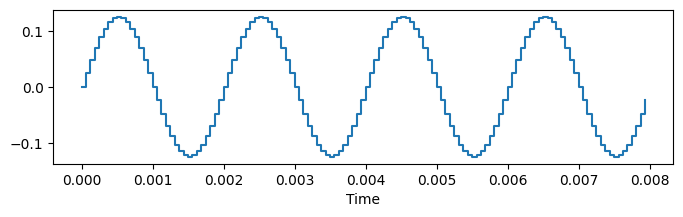

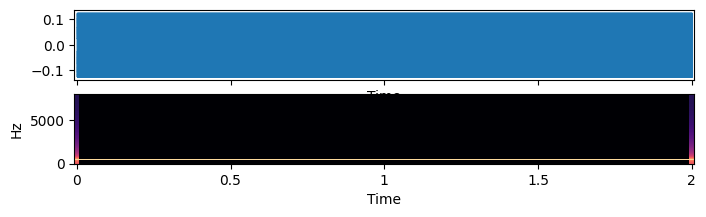

In [419]:
# Plot a segment of the tone, the full waveform, and its spectrogram
plt.figure(figsize=(8,2))
librosa.display.waveshow(y[0:128], sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,2))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
librosa.display.specshow(Y, sr=sr, n_fft=512, hop_length=256, x_axis='time', y_axis='linear')

In [412]:
# Reduce the amplitude of the signal to make it more vulnerable to quanization error. 
# Reduce the number of bits per sample
y = y/amp_reduction_ratio
y_nbit = y/2 * (2**(n_bits-1) + 2**(n_bits-1) - 1)
y_nbit = np.floor(y_nbit).astype(int).astype(float)
Y_nbit = librosa.amplitude_to_db(np.abs(librosa.stft(y_nbit, n_fft=512, hop_length=256)), ref=np.max) 
print(f"{n_bits}-bit audio ranges from -{2**(n_bits - 1)} to {2**(n_bits - 1) - 1}")
print(f"Max value: {np.max(y_nbit)} Avg value: {np.mean(y_nbit):.2f}")

4-bit audio ranges from -8 to 7
Max value: 0.0 Avg value: -0.50


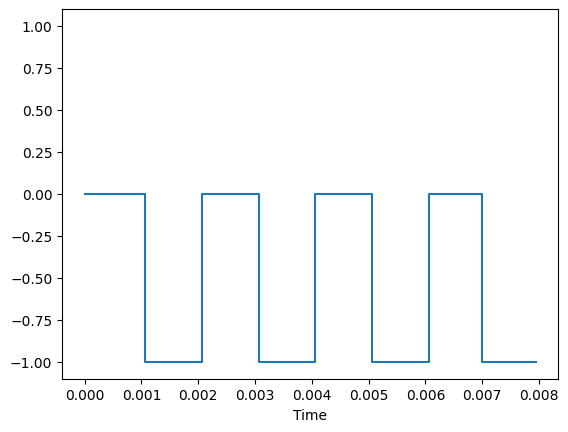

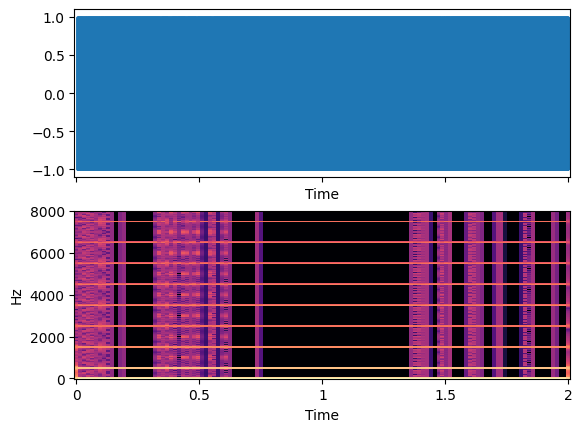

In [413]:
# Plot a short segment of the quantized waveform, the full waveform, and its spectrogram 
plt.figure()
librosa.display.waveshow(y_nbit[0:128], sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.waveshow(y_nbit, sr=sr, ax=ax[0])
librosa.display.specshow(Y_nbit, sr=sr, n_fft=512, hop_length=256, x_axis='time', y_axis='linear')

In [414]:
# Perform dithering by adding Gaussian noise
noise = np.random.normal(0, noise_var, y_nbit.shape[0])
z = y_nbit + noise
Z = librosa.amplitude_to_db(np.abs(librosa.stft(z, n_fft=512, hop_length=256)), ref=np.max) 

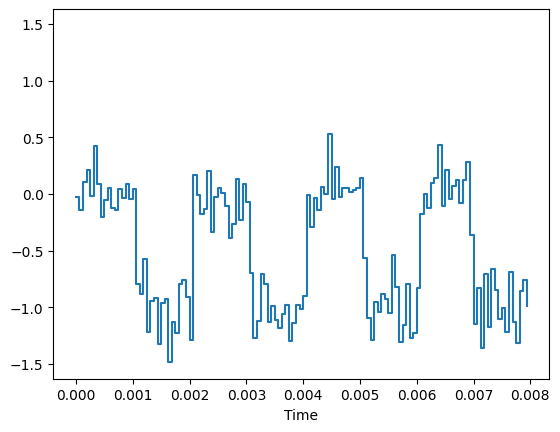

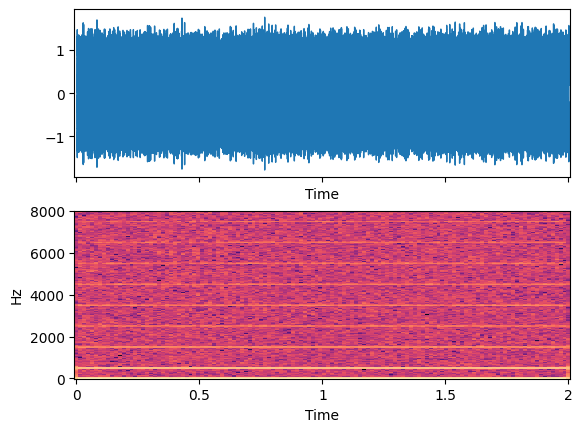

In [415]:
# Plot the dithered segment, the full dithered waveform, and its spectrogram
plt.figure()
librosa.display.waveshow(z[0:128], sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.waveshow(z, sr=sr, ax=ax[0])
librosa.display.specshow(Z, sr=sr, n_fft=512, hop_length=256, x_axis='time', y_axis='linear')

In [416]:
# Listen to the original waveform
Audio(data=y, rate=sr)

In [417]:
# Listen to the quantized waveform
Audio(data=y_nbit, rate=sr)

In [418]:
# Listen to the dithered waveform
Audio(data=z, rate=sr)